In [42]:
import squarify    # algorithm for treemap
import numpy as np
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### > Tree map
---

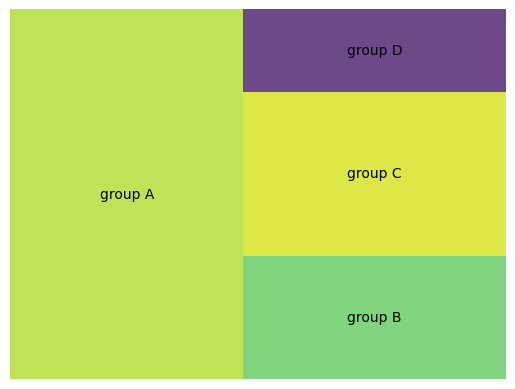

In [43]:
# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

### > Network chart
---

In [22]:
# Create a modular graph (dummy data)
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
g

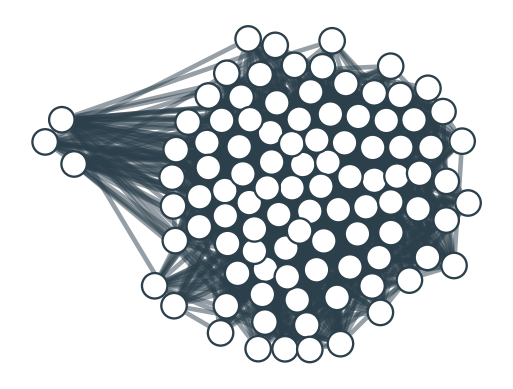

In [23]:
%%capture --no-display
# ^ Hide annoying warning for this cell

# Build graph
Graph(g)

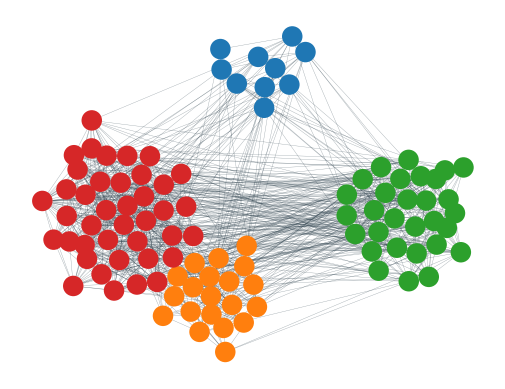

In [24]:
# Create a dictionary mapping nodes to their community. 
# This information is used position nodes according to their community 
# when using the `community` node layout in netgraph.
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

In [40]:
# ChatGPT


# Création du graphe
G = nx.Graph()

# Ajouter des arêtes (exemple avec 10 arêtes)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1),
         (1, 6), (2, 7), (3, 8), (8, 9), (9, 10)]
G.add_edges_from(edges)

# Position des nœuds avec l'algorithme Spring Layout
pos = nx.spring_layout(G, seed=42)

# Extraire les positions des nœuds
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]

# Extraire les arêtes pour les afficher sous forme de lignes
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# Création de la trace pour les arêtes
edges_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='gray'),
    hoverinfo='none'
)

# Création de la trace pour les nœuds
nodes_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers+text',
    text=[str(node) for node in G.nodes()],
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=20,
        color=[len(list(G.neighbors(node))) for node in G.nodes()],
        colorbar=dict(thickness=15, title='Node Connections', xanchor='left', titleside='right')
    ),
    textposition="bottom center"
)

# Ajouter les traces pour les arêtes et les nœuds à la figure
fig = go.Figure(data=[edges_trace, nodes_trace])

# Paramètres de mise en page pour l'interactivité
fig.update_layout(
    title="Network Graph avec Zoom/Dézoom",
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),# Ajout de 'scaleanchor' pour lier les axes X et Y pour le zoom
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white',
    margin=dict(l=0, r=0, t=40, b=0),
    dragmode='zoom',  # Permet le zoom et le déplacement
    # Paramètres de zoom via la molette
    xaxis_range=[-2, 2],  # Plage initiale pour l'axe X
    yaxis_range=[-2, 2],  # Plage initiale pour l'axe Y
    # Permet le zoom avec la molette de la souris (sans l'empêcher)
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Rockwell")
)

# Affichage du graphique
fig.show()


### > Circle jsplus
---

In [26]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)

In [27]:
# Build a dataset
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Show 3 first rows
df.head(3)

,name,value,group
0,item 1,31,A
1,item 2,77,A
2,item 3,71,A


In [28]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [29]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

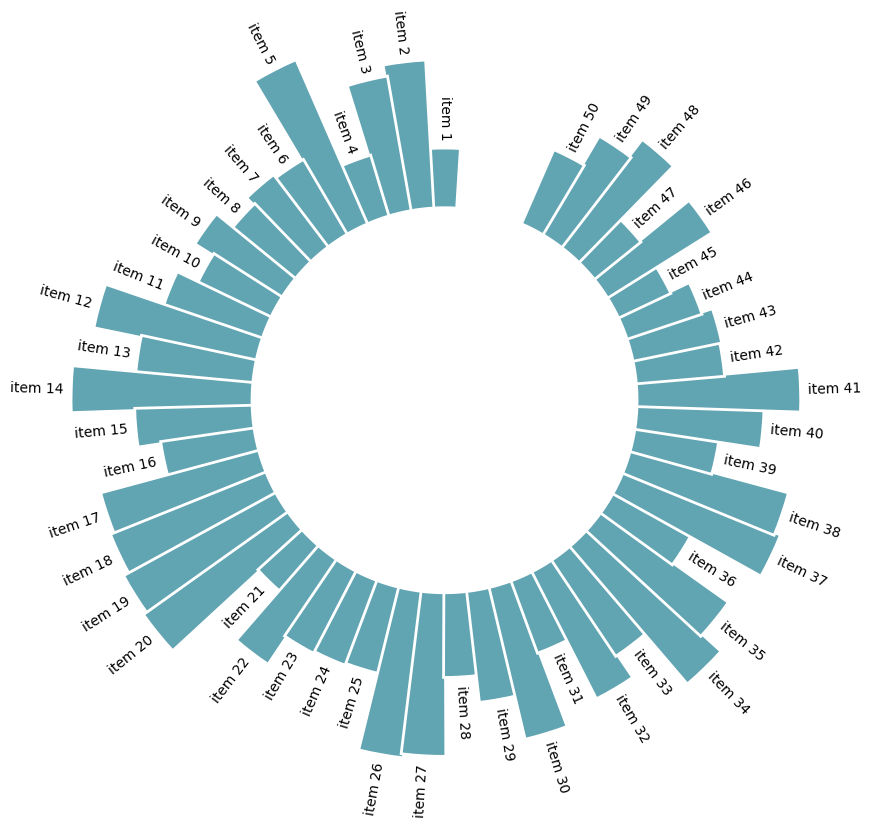

In [30]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# 3 empty bars are added 
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# The index contains non-empty bards
IDXS = slice(0, ANGLES_N - PAD)

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
# Add bars, subsetting angles to use only those that correspond to non-empty bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2", 
    edgecolor="white", linewidth=2
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

In [31]:
a = [1, 2, 3]
b = [4, 5, 6]

resultat = a + b
print(resultat)

[1, 2, 3, 4, 5, 6]
